In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Data dari tabel yang Anda berikan
data = np.array([
    [0.644, 0.9404, 0.6798, 0.8485, 5383, 0.6278],
    [0.604, 1.0568, 0.6421, 0.9806, 5831, 0.5647],
    [0.5563, 1.1816, 0.6066, 1.0748, 4513, 0.4669],
    [0.7048, 0.774, 0.7121, 0.7614, 10627, 0.8170],
    [0.6828, 0.8362, 0.7118, 0.7762, 10422, 0.7634],
    [0.6354, 0.9723, 0.6778, 0.8788, 9230, 0.6183],
    [0.6863, 0.8343, 0.6986, 0.7884, 12622, 0.7603],
    [0.7216, 0.7341, 0.7242, 0.728, 20527, 0.8328],
    [0.6692, 0.8705, 0.6962, 0.8124, 10386, 0.7161],
])

# Nama solusi
solution_names = [
    "16 x 50", "32 x 50", "64 x 50", 
    "16 x 100", "32 x 100", "64 x 100", 
    "16 x 150", "32 x 150", "64 x 150"
]

# Indeks yang perlu dimaksimalkan dan diminimalkan
maximize_indices = [0, 2, 5]  # Train Accuracy, Validation Accuracy, Testing Accuracy
minimize_indices = [1, 3, 4]  # Train Loss, Validation Loss, Running Time

# Normalisasi data
def normalize_data(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    return (data - min_vals) / (max_vals - min_vals)

normalized_data = normalize_data(data)

# Tampilkan data setelah normalisasi
print("Data setelah normalisasi:")
print(normalized_data)

# Fungsi untuk mengecek dominasi
def dominates(i, j):
    return (all(i[maximize_indices] >= j[maximize_indices]) and
            any(i[maximize_indices] > j[maximize_indices]) and
            all(i[minimize_indices] <= j[minimize_indices]))

# MOPSO Parameters
num_particles = min(9, normalized_data.shape[0])  # Sesuaikan jumlah partikel dengan jumlah data
num_iterations = 50
particles = np.random.rand(num_particles, normalized_data.shape[1])  # Inisialisasi partikel
velocities = np.random.rand(num_particles, normalized_data.shape[1]) * 0.1  # Kecepatan awal
pbest = particles.copy()  # PBest diinisialisasi dengan posisi awal
gbest = None

# MOPSO Loop
for iteration in range(num_iterations):
    # Evaluasi setiap partikel
    for i in range(num_particles):
        for j in range(num_particles):
            if dominates(normalized_data[i], normalized_data[j]):
                pbest[i] = normalized_data[i]  # Update PBest
                if gbest is None or dominates(normalized_data[i], normalized_data[gbest]):
                    gbest = i  # Update GBest

    # Update posisi dan kecepatan
    r1, r2 = np.random.rand(2)
    for i in range(num_particles):
        velocities[i] = (velocities[i] + 
                         r1 * (pbest[i] - particles[i]) + 
                         r2 * (normalized_data[gbest] - particles[i]))
        particles[i] += velocities[i]
        # Pastikan partikel tetap dalam batas normalisasi
        particles[i] = np.clip(particles[i], 0, 1)

# Evaluasi solusi non-dominated
non_dominated_indices = []
for i in range(num_particles):
    if not any(dominates(normalized_data[j], normalized_data[i]) for j in range(num_particles) if i != j):
        non_dominated_indices.append(i)

# Tampilkan data non-dominated
print("\nData non-dominated:")
non_dominated_data = normalized_data[non_dominated_indices]
non_dominated_names = [solution_names[i] for i in non_dominated_indices]  # Ambil nama sesuai indeks
for name, data in zip(non_dominated_names, non_dominated_data):
    print(f"{name}: {data}")

# Mengurutkan data non-dominated
sorted_non_dominated_data = sorted(
    zip(non_dominated_names, non_dominated_data),
    key=lambda x: (
        -x[1][maximize_indices].sum(),  # Maksimalkan berdasarkan kriteria
        x[1][minimize_indices].sum()     # Minimalkan berdasarkan kriteria
    )
)

# Tampilkan hasil yang telah diurutkan
print("\nData non-dominated-sorted:")
for name, values in sorted_non_dominated_data:
    print(f"{name}: {values}")


Data setelah normalisasi:
[[0.53055051 0.46100559 0.62244898 0.34746251 0.05432746 0.43973763]
 [0.28856624 0.72111732 0.30187075 0.7283737  0.08230298 0.26728614]
 [0.         1.         0.         1.         0.         0.        ]
 [0.89836661 0.08916201 0.89710884 0.09630911 0.38179093 0.9568188 ]
 [0.76527526 0.22815642 0.89455782 0.13898501 0.36898963 0.81033069]
 [0.4785239  0.5322905  0.60544218 0.43483276 0.29455476 0.41377426]
 [0.78644888 0.22391061 0.78231293 0.17416378 0.50636943 0.80185843]
 [1.         0.         1.         0.         1.         1.        ]
 [0.6830006  0.30480447 0.76190476 0.24336794 0.3667416  0.6810604 ]]

Data non-dominated:
16 x 50: [0.53055051 0.46100559 0.62244898 0.34746251 0.05432746 0.43973763]
64 x 50: [0. 1. 0. 1. 0. 0.]
16 x 100: [0.89836661 0.08916201 0.89710884 0.09630911 0.38179093 0.9568188 ]
32 x 100: [0.76527526 0.22815642 0.89455782 0.13898501 0.36898963 0.81033069]
32 x 150: [1. 0. 1. 0. 1. 1.]
64 x 150: [0.6830006  0.30480447 0.7619

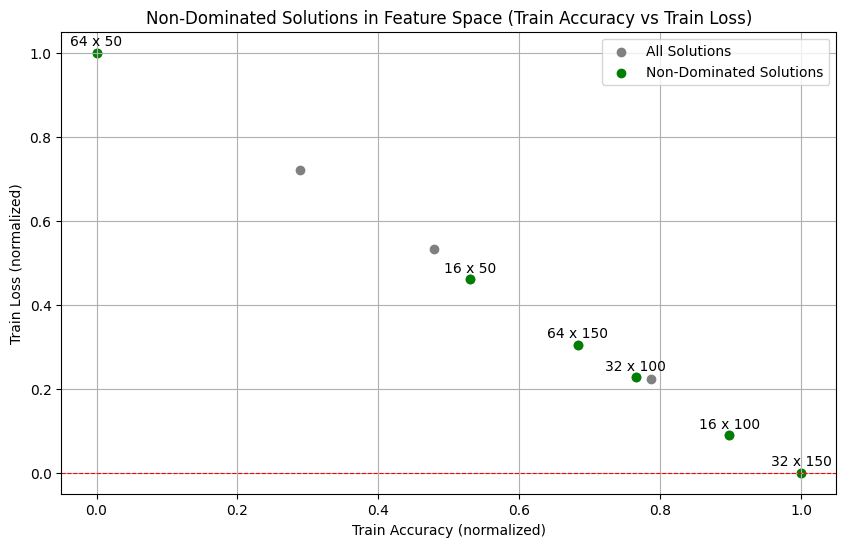

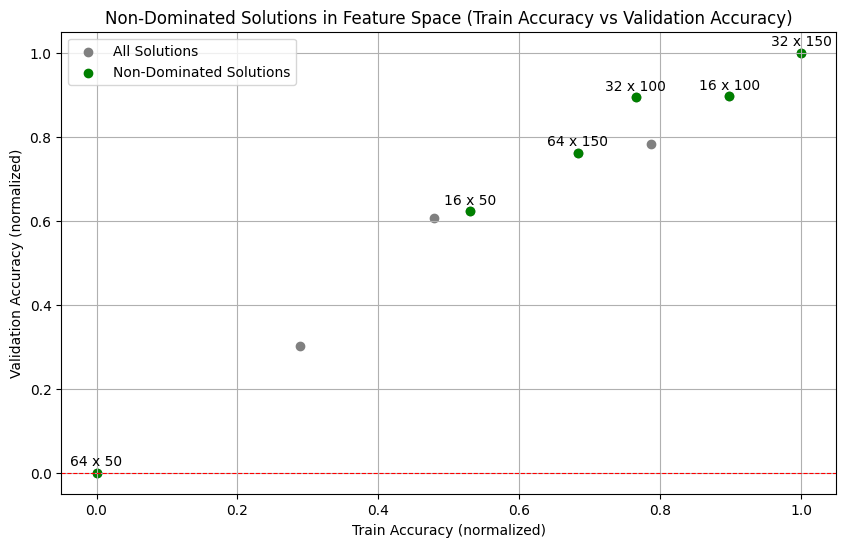

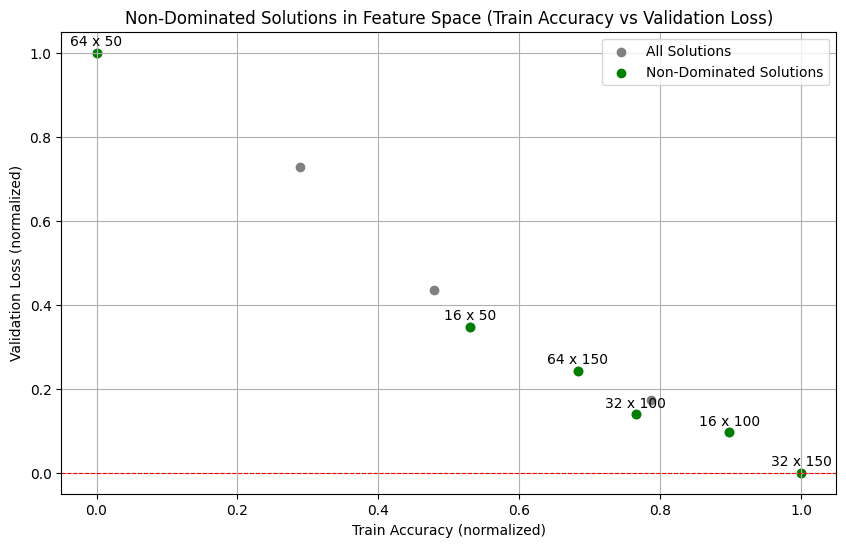

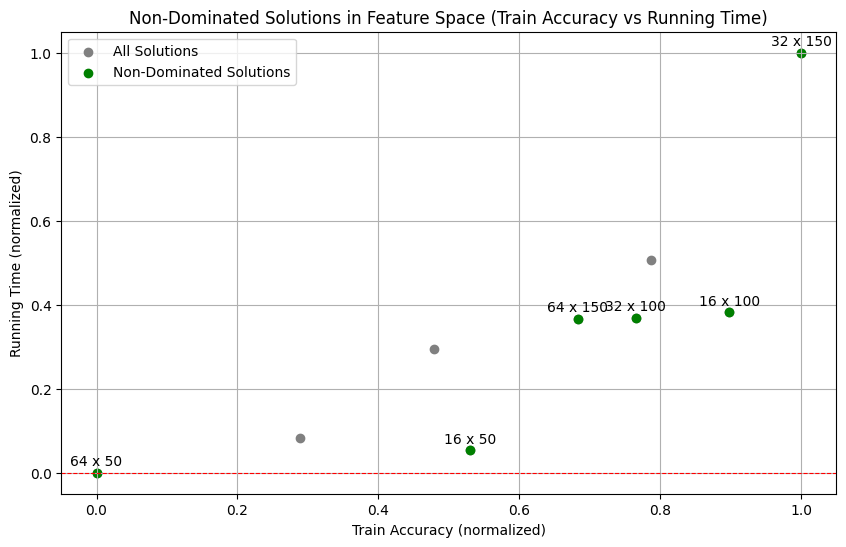

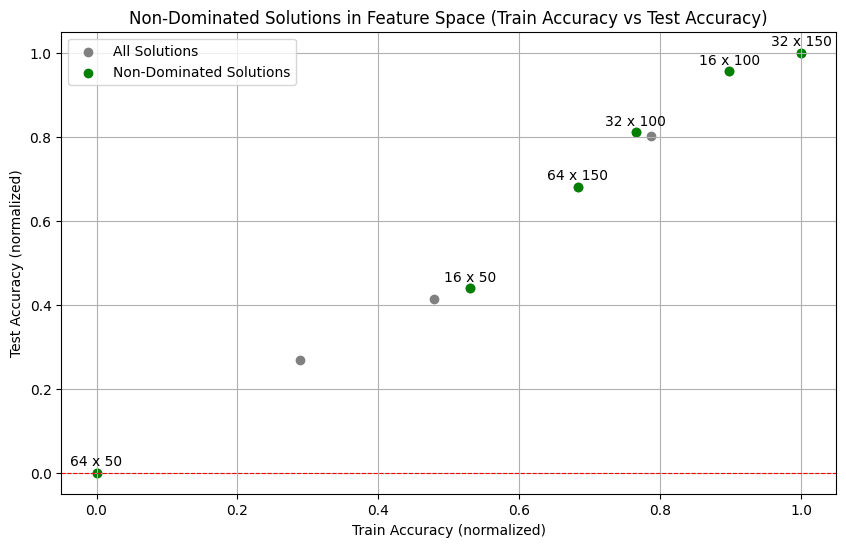

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Pisahkan data dan nama dari solusi non-dominated yang sudah diurutkan
sorted_non_dominated_names = [item[0] for item in sorted_non_dominated_data]
sorted_non_dominated_values = np.array([item[1] for item in sorted_non_dominated_data])

# Fungsi visualisasi untuk setiap kriteria
def plot_non_dominated_criteria(x_idx, y_idx, x_label, y_label, criterion_name):
    plt.figure(figsize=(10, 6))
    
    # Plot semua solusi
    plt.scatter(normalized_data[:, x_idx], normalized_data[:, y_idx], label='All Solutions', color='gray')
    
    # Plot solusi non-dominated yang sudah diurutkan
    plt.scatter(sorted_non_dominated_values[:, x_idx], sorted_non_dominated_values[:, y_idx], 
                label='Non-Dominated Solutions', color='green')
    
    # Tambahkan label hanya pada titik-titik non-dominated
    for idx, (x, y) in enumerate(sorted_non_dominated_values[:, [x_idx, y_idx]]):
        plt.annotate(sorted_non_dominated_names[idx], (x, y), textcoords="offset points", xytext=(0,5), ha='center')

    plt.title(f'Non-Dominated Solutions in Feature Space ({criterion_name})')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.axhline(0, color='red', linewidth=0.8, linestyle='--')
    plt.grid(axis='both')
    plt.legend()
    plt.show()

# KRITERIA 1 & 2 - Train Accuracy vs Train Loss
plot_non_dominated_criteria(
    x_idx=0, y_idx=1,
    x_label='Train Accuracy (normalized)',
    y_label='Train Loss (normalized)',
    criterion_name="Train Accuracy vs Train Loss"
)

# KRITERIA 1 & 3 - Train Accuracy vs Val Accuracy
plot_non_dominated_criteria(
    x_idx=0, y_idx=2,
    x_label='Train Accuracy (normalized)',
    y_label='Validation Accuracy (normalized)',
    criterion_name="Train Accuracy vs Validation Accuracy"
)

# KRITERIA 1 & 4 - Train Accuracy vs Val Loss
plot_non_dominated_criteria(
    x_idx=0, y_idx=3,
    x_label='Train Accuracy (normalized)',
    y_label='Validation Loss (normalized)',
    criterion_name="Train Accuracy vs Validation Loss"
)

# KRITERIA 1 & 5 - Train Accuracy vs Running Time
plot_non_dominated_criteria(
    x_idx=0, y_idx=4,
    x_label='Train Accuracy (normalized)',
    y_label='Running Time (normalized)',
    criterion_name="Train Accuracy vs Running Time"
)

# KRITERIA 1 & 6 - Train Accuracy vs Test Accuracy
plot_non_dominated_criteria(
    x_idx=0, y_idx=5,
    x_label='Train Accuracy (normalized)',
    y_label='Test Accuracy (normalized)',
    criterion_name="Train Accuracy vs Test Accuracy"
)


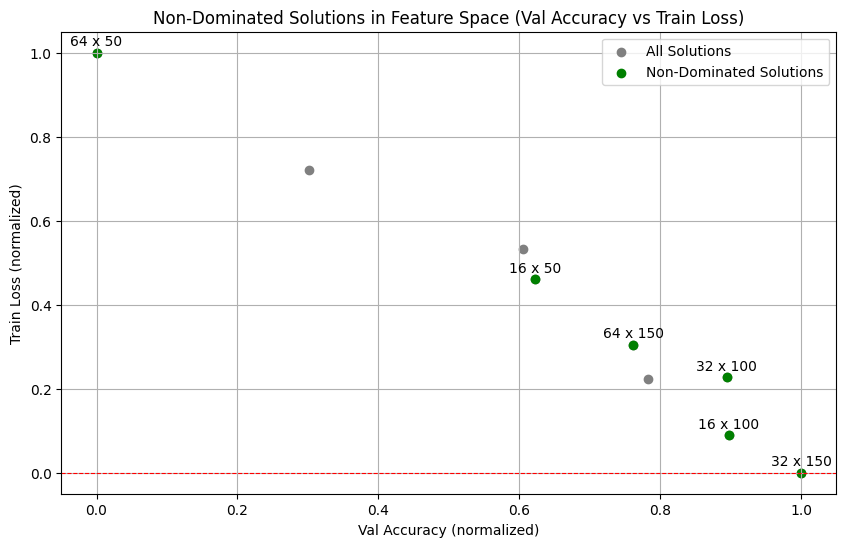

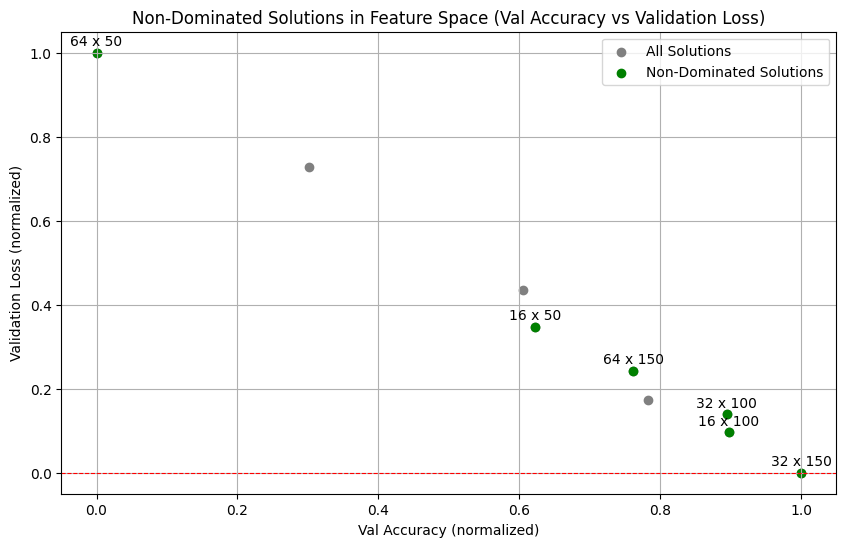

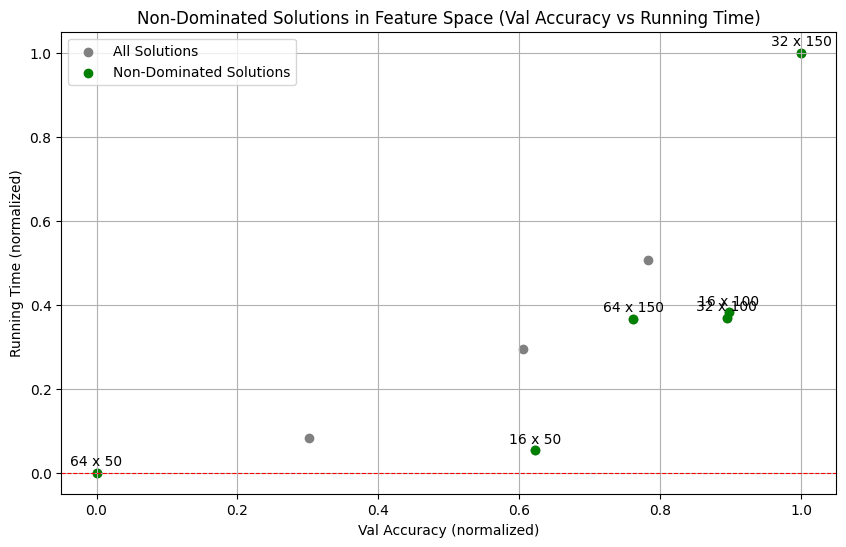

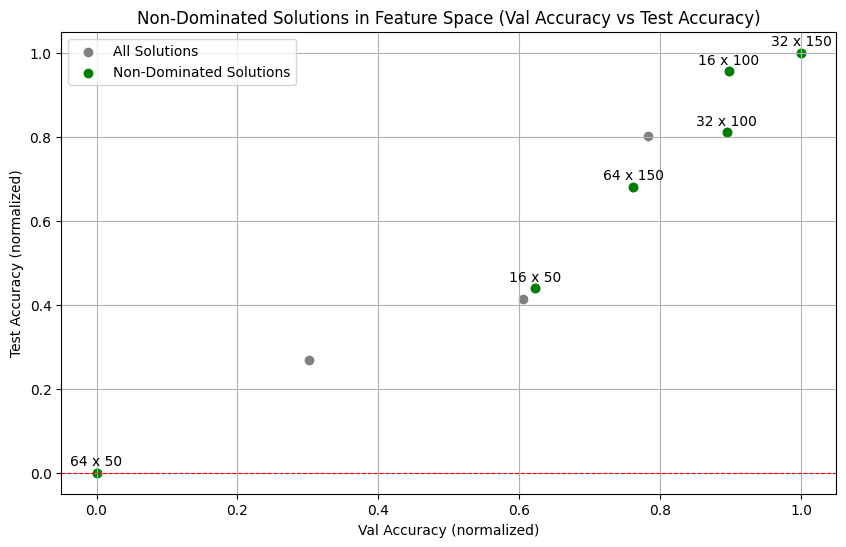

In [14]:
# KRITERIA 3 & 2 - Validation Accuracy vs Train Loss
plot_non_dominated_criteria(
    x_idx=2, y_idx=1,
    x_label='Val Accuracy (normalized)',
    y_label='Train Loss (normalized)',
    criterion_name="Val Accuracy vs Train Loss"
)

# KRITERIA 3 & 4 - Val Accuracy vs Val Loss
plot_non_dominated_criteria(
    x_idx=2, y_idx=3,
    x_label='Val Accuracy (normalized)',
    y_label='Validation Loss (normalized)',
    criterion_name="Val Accuracy vs Validation Loss"
)

# KRITERIA 3 & 5 - Val Accuracy vs Running Time
plot_non_dominated_criteria(
    x_idx=2, y_idx=4,
    x_label='Val Accuracy (normalized)',
    y_label='Running Time (normalized)',
    criterion_name="Val Accuracy vs Running Time"
)

# KRITERIA 3 & 6 - Train Accuracy vs Test Accuracy
plot_non_dominated_criteria(
    x_idx=2, y_idx=5,
    x_label='Val Accuracy (normalized)',
    y_label='Test Accuracy (normalized)',
    criterion_name="Val Accuracy vs Test Accuracy"
)


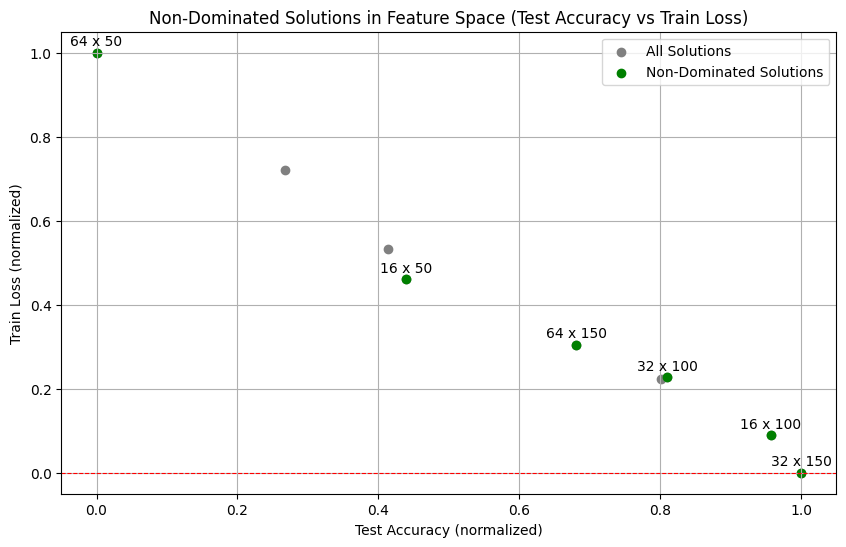

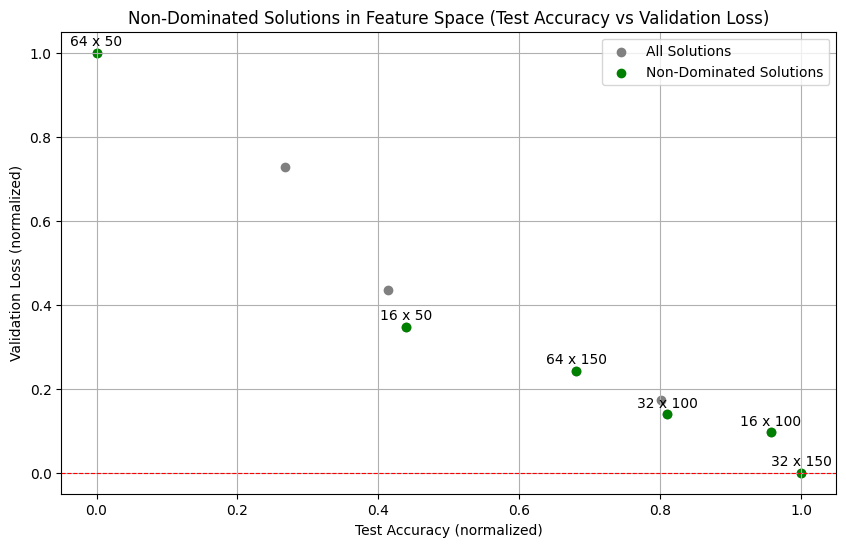

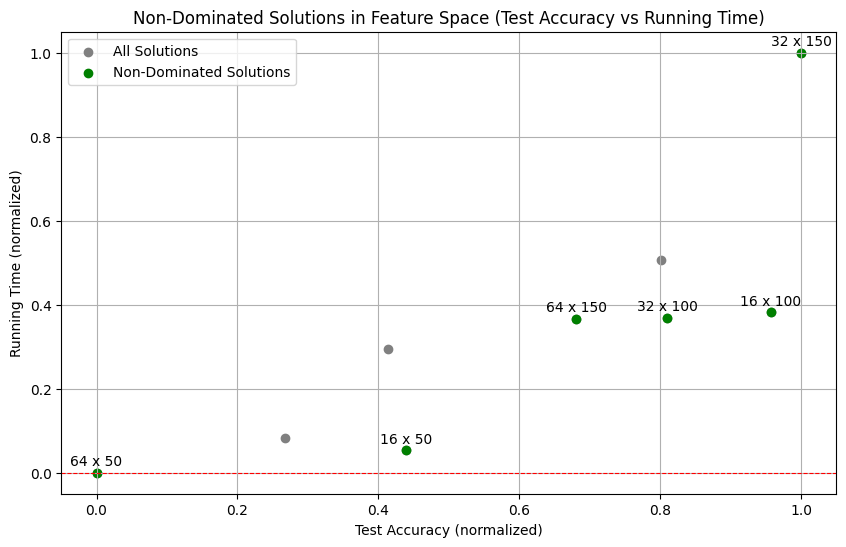

In [17]:
# KRITERIA 6 & 2 - Test Accuracy vs Train Loss
plot_non_dominated_criteria(
    x_idx=5, y_idx=1,
    x_label='Test Accuracy (normalized)',
    y_label='Train Loss (normalized)',
    criterion_name="Test Accuracy vs Train Loss"
)

# KRITERIA 6 & 4 - Test Accuracy vs Val Loss
plot_non_dominated_criteria(
    x_idx=5, y_idx=3,
    x_label='Test Accuracy (normalized)',
    y_label='Validation Loss (normalized)',
    criterion_name="Test Accuracy vs Validation Loss"
)

# KRITERIA 6 & 5 - Test Accuracy vs Running Time
plot_non_dominated_criteria(
    x_idx=5, y_idx=4,
    x_label='Test Accuracy (normalized)',
    y_label='Running Time (normalized)',
    criterion_name="Test Accuracy vs Running Time"
)

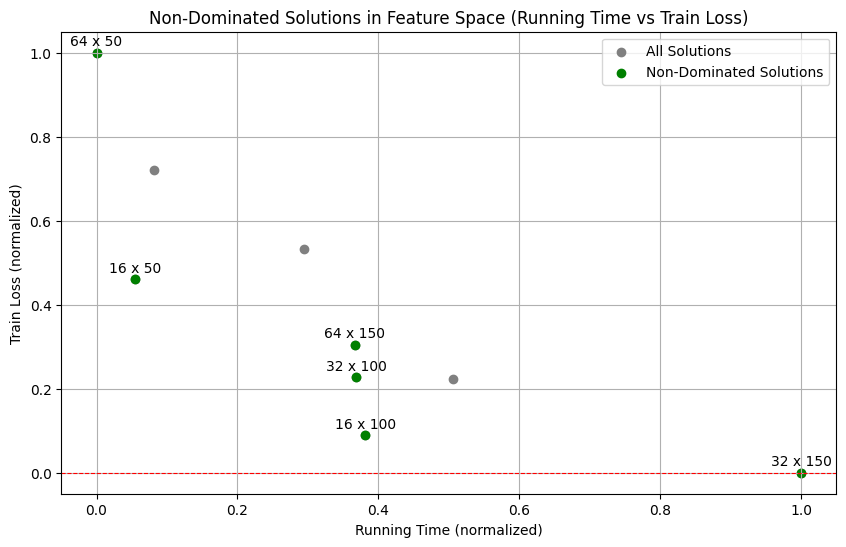

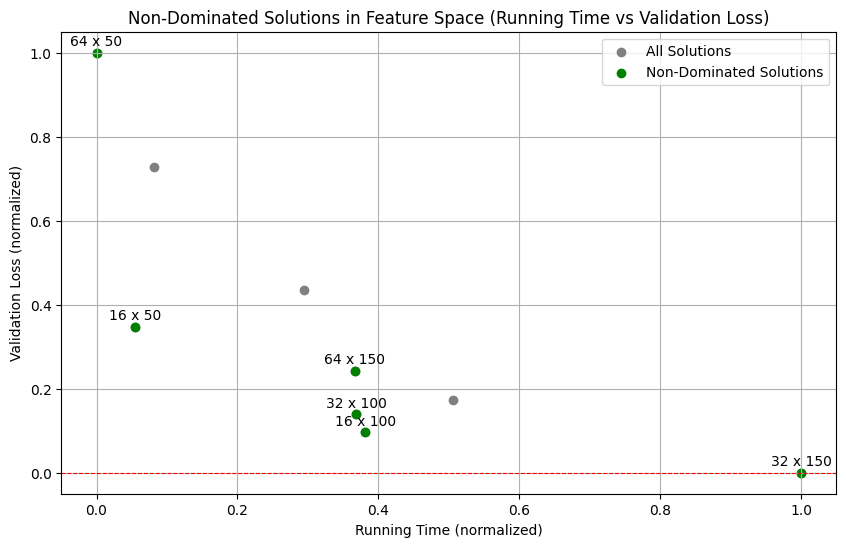

In [18]:
# KRITERIA 5 & 2 - Running Time vs Train Loss
plot_non_dominated_criteria(
    x_idx=4, y_idx=1,
    x_label='Running Time (normalized)',
    y_label='Train Loss (normalized)',
    criterion_name="Running Time vs Train Loss"
)

# KRITERIA 5 & 4 - Running Time vs Val Loss
plot_non_dominated_criteria(
    x_idx=4, y_idx=3,
    x_label='Running Time (normalized)',
    y_label='Validation Loss (normalized)',
    criterion_name="Running Time vs Validation Loss"
)

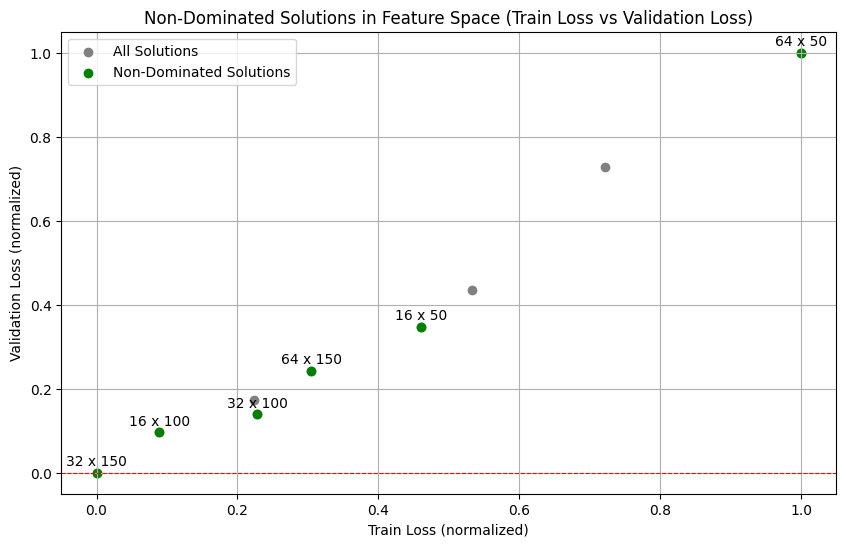

In [19]:
# KRITERIA 2 & 4 - Train Loss vs Val Loss
plot_non_dominated_criteria(
    x_idx=1, y_idx=3,
    x_label='Train Loss (normalized)',
    y_label='Validation Loss (normalized)',
    criterion_name="Train Loss vs Validation Loss"
)